# Market Basket Analysis & Recommender - Product Based Colloborative  Filtering 

#### Akhilesh Kulkarni 

### Introduction

This code presents the analysis done on the sales transaction dataset from a E-Commerce giant. The dataset used was taken from Kaggle.com . The following is performed on the dataset :-
###### Data Preprocessing 
###### Exploratory Data Analysis 
###### Word Cloud 
###### Market Basket Analysis (Apriori Algorithm using Association Rules)
###### Co - occurrence matrix 
###### Recommender - Product Based Filtering


### Data Processing

The first step was to  remove outliers and replace the missing data and conduct exploratory data analysis to gain insights from the data.

In [1]:
import pandas as pd
import numpy as np
import random 
from matplotlib import pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

%matplotlib inline


In [2]:
sales = pd.read_csv('D:/Python/Project/Market Basket Analysis/MBA - ecommerce.csv',encoding= 'unicode_escape')

In [3]:
sales.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
len(sales.index)

541909

In [5]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
sales.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
sales.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


The above table indicates that there are negative values for unit price and quantity. But this is incorrect as product quantity and its price cannot be negative.

In [8]:
nosales = sales[sales["Quantity"] < 0]
print ("Length of data with negative quantity: " + str(len(nosales.index)))
nosales.head()

Length of data with negative quantity: 10624


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom


In [9]:
noprice = sales[sales["UnitPrice"] < 0]
print ("Length of data with negative price: " + str(len(noprice.index)))
print (noprice)

Length of data with negative price: 2
       InvoiceNo StockCode      Description  Quantity      InvoiceDate  \
299983   A563186         B  Adjust bad debt         1  8/12/2011 14:51   
299984   A563187         B  Adjust bad debt         1  8/12/2011 14:52   

        UnitPrice  CustomerID         Country  
299983  -11062.06         NaN  United Kingdom  
299984  -11062.06         NaN  United Kingdom  


The two above code blocks shows that has negative values in quantity and unitprice account to about 10626 data points. These must be removed as they will affect the Apriori Algorithm - Association analysis and Recommendation System. 

In [10]:
frames = [noprice, nosales]
result = pd.concat(frames)

newsales = sales[~sales["InvoiceNo"].isin(result["InvoiceNo"])]

After dealing with negative values,it is utmost important to treat the missing values.

In [11]:
nocusID = newsales[sales["CustomerID"].isnull()]
len(nocusID.index)

<ipython-input-11-23aa6ad443d4>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nocusID = newsales[sales["CustomerID"].isnull()]


133359

In [12]:
noPN = newsales[newsales["Description"].isnull()]
len(noPN.index)

592

In [13]:
listPN = noPN["StockCode"].tolist()
len(newsales[newsales["StockCode"].isin(listPN)].index)

48967

In [14]:
noPN.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,12/1/2010 14:32,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,12/1/2010 14:34,0.0,NaN,United Kingdom


In [15]:
noID_PN = newsales[newsales["CustomerID"].isnull() & newsales["Description"].isnull()]
len(noID_PN.index)

592

There are total 1454 missing values of Description (product name) along with the cusotmeID. So either you can replace it by matching with the stock code because it is a unique code for each product. But in this case as you can see the respective rows have missing values of customerID and have unit price as zero. So it would be better to delete or remove these 1454 values from the dataset/dataframe. 

In [16]:
#Removing observations with no descriptions (product name) 
newsales = newsales[~newsales["Description"].isnull()]
len(newsales.index)

530691

To deal with the missing values of customerID, you can replace it randomly with the CusotmerID from the existing dataframe. This way is used because as the product is sold and all other details are valid, hence it is a valid transaction.Someone has purchased those products and is enough for us to carry the Market Basket Analysis.

In [17]:
#Replacing the missing Customer ID with randomly choosing customerID from the dataset
newsales["CustomerID"].fillna(lambda x: random.choice(newsales[newsales["CustomerID"] != np.nan]["CustomerID"]), inplace = True)

In [18]:
#Checking for any missing values
newsales.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

After this the row with zero unit price is romoved from the dataset as it will hamper the results.

In [19]:
zeroUnitP = newsales[newsales["UnitPrice"] == 0]
len(zeroUnitP.index)

587

In [20]:
newsales = newsales[~(newsales["UnitPrice"] == 0)]

In [49]:
newsales.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,NetSales,Hour,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,8,Dec
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,8,Dec
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,8,Dec
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,8,Dec
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,8,Dec



### Exploratory Data Analysis (EDA)


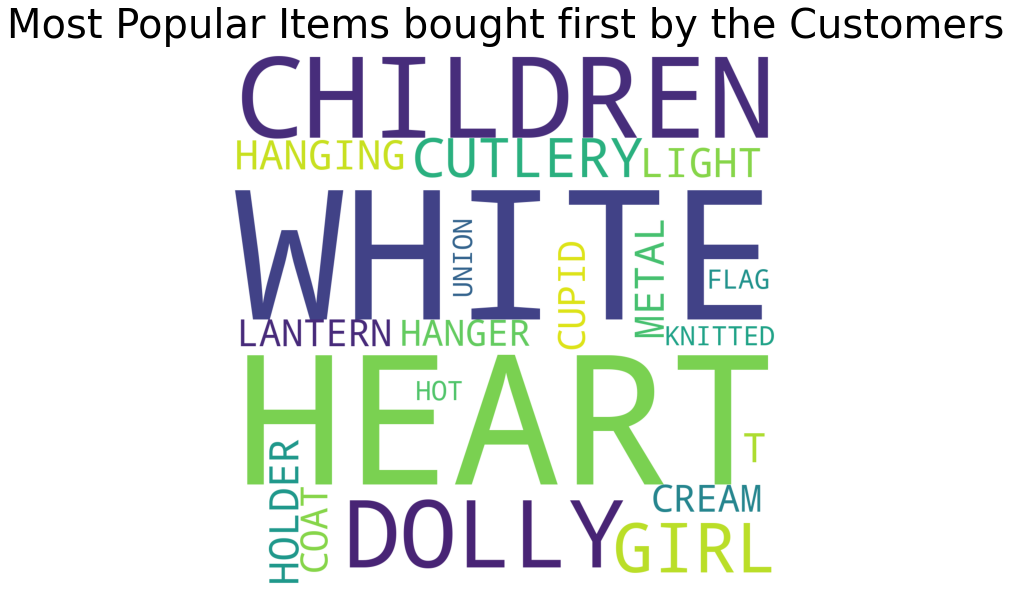

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (10, 10)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 20).generate(str(newsales['Description']))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Items bought first by the Customers',fontsize = 40)
plt.show()

In [21]:
mostsoldprod = newsales.groupby(["StockCode", "Description"])["Quantity"].sum().reset_index().sort_values("Quantity", ascending = False)

mostsoldprod.reset_index(level = 0, inplace=True)
del mostsoldprod["index"]

mostsoldprod.head(10)

,StockCode,Description,Quantity
0,23843,"PAPER CRAFT , LITTLE BIRDIE",80995
1,23166,MEDIUM CERAMIC TOP STORAGE JAR,78033
2,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,55047
3,85099B,JUMBO BAG RED RETROSPOT,48474
4,85123A,WHITE HANGING HEART T-LIGHT HOLDER,37599
5,22197,POPCORN HOLDER,36761
6,84879,ASSORTED COLOUR BIRD ORNAMENT,36461
7,21212,PACK OF 72 RETROSPOT CAKE CASES,36419
8,23084,RABBIT NIGHT LIGHT,30788
9,22492,MINI PAINT SET VINTAGE,26633


Text(0.5, 1.0, 'Most Quantities of Products Sold')

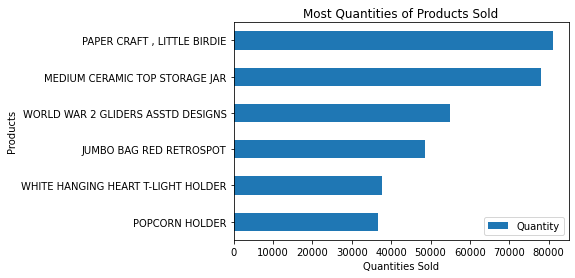

In [22]:
top5 = mostsoldprod.loc[0:5,["Description", "Quantity"]].sort_values("Quantity", ascending = True)
top5

top5.plot(kind = "barh", x = "Description", align = "center")
plt.ylabel('Products')
plt.xlabel('Quantities Sold')
plt.title('Most Quantities of Products Sold')

In [23]:
newsales["NetSales"] = newsales["Quantity"] * newsales["UnitPrice"]

In [24]:
highgrossprod = newsales.groupby(["StockCode","Description"])["NetSales"].sum().sort_values(ascending = False)
highgrossprod.head(5)



StockCode  Description                       
DOT        DOTCOM POSTAGE                        206248.77
22423      REGENCY CAKESTAND 3 TIER              174484.74
23843      PAPER CRAFT , LITTLE BIRDIE           168469.60
85123A     WHITE HANGING HEART T-LIGHT HOLDER    104340.29
47566      PARTY BUNTING                          99504.33
Name: NetSales, dtype: float64

Text(0.5, 1.0, 'Most Sold Products')

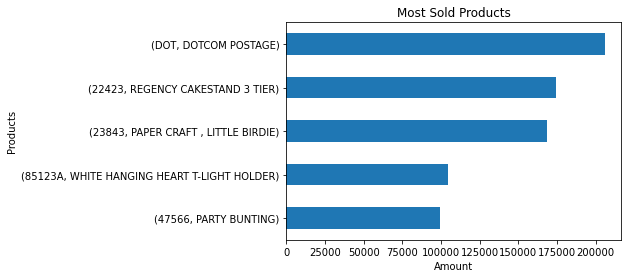

In [25]:
top5gros = highgrossprod[:5,].sort_values(ascending = True)

top5gros.plot(kind = "barh", x = "Description", align = "center")
plt.ylabel('Products')
plt.xlabel('Amount')
plt.title('Most Sold Products')

Also, the products which were most frequently sold were found as well. 

In [26]:
freqprod = newsales.groupby(["StockCode", "Description"])["Description"].count().sort_values(axis = 0,
                                                                                             ascending = 
                                                                                             False)
freqprod.head(5)

StockCode  Description                       
85123A     WHITE HANGING HEART T-LIGHT HOLDER    2256
85099B     JUMBO BAG RED RETROSPOT               2112
22423      REGENCY CAKESTAND 3 TIER              2017
47566      PARTY BUNTING                         1706
20725      LUNCH BAG RED RETROSPOT               1594
Name: Description, dtype: int64

Text(0.5, 1.0, 'Most Frequently Sold Products')

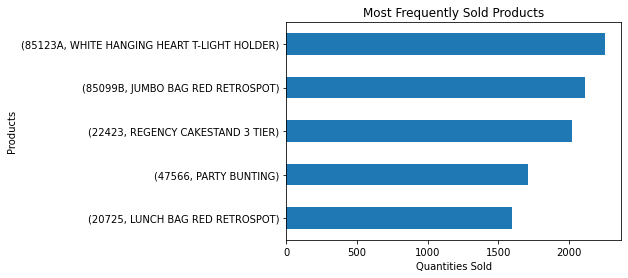

In [27]:
top5freq = freqprod[:5,].sort_values(ascending = True)

top5freq.plot(kind = "barh")
plt.ylabel('Products')
plt.xlabel('Quantities Sold')
plt.title('Most Frequently Sold Products')

Week and months in which the company had most transactions.

In [28]:
newsales["InvoiceDate"] = pd.to_datetime(newsales["InvoiceDate"])

In [29]:
newsales["Hour"] = newsales["InvoiceDate"].dt.hour
newsales.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,NetSales,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,8


In [30]:
salesbyhour = newsales.groupby(["Hour"])["InvoiceNo"].count()


Text(0.5, 1.0, 'Transaction throughout the day')

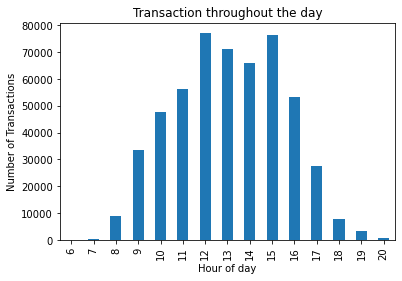

In [31]:
salesbyhour.plot(kind = "bar", x = "InvoiceNo")
plt.xlabel("Hour of day")
plt.ylabel("Number of Transactions")
plt.title("Transaction throughout the day")

#### The most transactions were carried out between 10 AM to 4 PM

In [32]:
print(newsales["InvoiceDate"].min())
print(newsales["InvoiceDate"].max())

2010-12-01 08:26:00
2011-12-09 12:50:00


In [33]:
newsales['Month'] = newsales['InvoiceDate'].dt.strftime('%b')
newsales["Month"] = newsales["Month"].astype('O')

m = newsales.groupby(['Month'])['InvoiceNo'].count().sort_values(ascending = True)

m.head()


Month
Feb    27105
Apr    29096
Jan    34306
Aug    34483
Mar    35803
Name: InvoiceNo, dtype: int64

Text(0.5, 1.0, 'Months with Most Transactions')

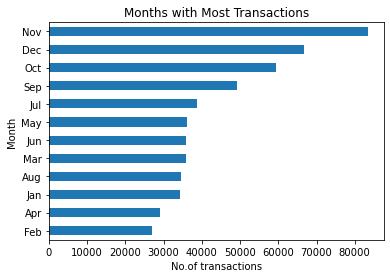

In [34]:
m.plot(kind = "barh")
plt.xlabel("No.of transactions")
plt.ylabel("Month")
plt.title("Months with Most Transactions")

Finally, given that the dataset ranges over an entire year, November was considered to be the month with the most amoubnt of transactions. This makes sense because it is closer to Christmas.

## Market Basket Analysis Using Association Analysis

#### Market basket analysis 
It is a data mining technique used by retailers to increase sales by better understanding customer purchasing patterns. It involves analyzing large data sets, such as purchase history, to reveal product groupings, as well as products that are likely to be purchased together.

Market Basket Analysis creates If-Then scenario rules, for example, if item A is purchased then item B is likely to be purchased. The rules are probabilistic in nature or, in other words, they are derived from the frequencies of co-occurrence in the observations. Frequency is the proportion of baskets that contain the items of interest. The rules can be used in pricing strategies, product placement, and various types of cross-selling strategies.

#### How it works:- 
Market Basket Analysis takes data at transaction level, which lists all items bought by a customer in a single purchase. The technique determines relationships of what products were purchased with which other product(s). These relationships are then used to build profiles containing If-Then rules of the items purchased.

Association Rules are widely used to analyze retail basket or transaction data, and are intended to identify strong rules discovered in transaction data using measures of interestingness, based on the concept of strong rules. 

 
#### Main metrics to consider in assoication analysis is as follows:
 
Support: Support measures how frequently an association rule happens in a dataset

Confidence: Confidence measures how strong an association rule is

Lift:  lift measures the performance of a targeting model (known as an association rule) at predicting a specific outcome,
       compared with a random choice. Therefore, Lift is the ratio between target response and average response. That is to say        that Lift is a ratio between confidence and expected confidence.


First a matrix is created with InvoiceNo as the index and Description as the columns and the matrix is plotted with the quantities of each item. The quantity values are hot encoded to create a sparse matrix with 1s and 0s.

In [35]:
basket = (newsales.groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))
basket.head()

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
basket.copy = basket 
basket.copy.head()

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
basket.copy = basket.copy.astype(int)

In [46]:
basket.copy.shape

(19960, 4026)

In [39]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.copy.applymap(encode_units)
basket_sets.drop('POSTAGE', inplace=True, axis=1)
basket_sets.head()


Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
basket_sets.dtypes

Description
 4 PURPLE FLOCK DINNER CANDLES      int64
 50'S CHRISTMAS GIFT BAG LARGE      int64
 DOLLY GIRL BEAKER                  int64
 I LOVE LONDON MINI BACKPACK        int64
 I LOVE LONDON MINI RUCKSACK        int64
                                    ...  
ZINC T-LIGHT HOLDER STARS SMALL     int64
ZINC TOP  2 DOOR WOODEN SHELF       int64
ZINC WILLIE WINKIE  CANDLE STICK    int64
ZINC WIRE KITCHEN ORGANISER         int64
ZINC WIRE SWEETHEART LETTER TRAY    int64
Length: 4025, dtype: object

Apriori algorithm was used to calculate the lift, support and confidence. The results were filtered to show items that can bought together which have more than 6 lift and confidence of 0.6.

In [41]:
frequent_itemsets = apriori(basket_sets, min_support=0.03, use_colnames=True)


In [42]:
#Build frequent itemsets
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.047846,(6 RIBBONS RUSTIC CHARM),1
1,0.030962,(60 CAKE CASES VINTAGE CHRISTMAS),1
2,0.041483,(60 TEATIME FAIRY CAKE CASES),1
3,0.030812,(72 SWEETHEART FAIRY CAKE CASES),1
4,0.049098,(ALARM CLOCK BAKELIKE GREEN),1
...,...,...,...
135,0.041333,"(JUMBO BAG PINK POLKADOT, JUMBO BAG RED RETROS...",2
136,0.034068,"(JUMBO SHOPPER VINTAGE RED PAISLEY, JUMBO BAG ...",2
137,0.036273,"(JUMBO STORAGE BAG SUKI, JUMBO BAG RED RETROSPOT)",2
138,0.032114,"(LUNCH BAG RED RETROSPOT, LUNCH BAG BLACK SKU...",2


In [43]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.049098,0.052655,0.032064,0.653061,12.402571,0.029479,2.730582
1,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN),0.052655,0.049098,0.032064,0.608944,12.402571,0.029479,2.431625
2,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.050752,0.038327,0.031663,0.623889,16.278213,0.029718,2.556890
3,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.038327,0.050752,0.031663,0.826144,16.278213,0.029718,5.459963
4,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.050752,0.053357,0.038427,0.757157,14.190472,0.035719,3.898169


In [44]:
#Products having 60% confidence likely to be purchased together
rules[(rules['lift'] >= 6) & (rules['confidence'] >= 0.6)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.049098,0.052655,0.032064,0.653061,12.402571,0.029479,2.730582
1,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN),0.052655,0.049098,0.032064,0.608944,12.402571,0.029479,2.431625
2,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.050752,0.038327,0.031663,0.623889,16.278213,0.029718,2.556890
3,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.038327,0.050752,0.031663,0.826144,16.278213,0.029718,5.459963
4,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.050752,0.053357,0.038427,0.757157,14.190472,0.035719,3.898169
5,(ROSES REGENCY TEACUP AND SAUCER ),(GREEN REGENCY TEACUP AND SAUCER),0.053357,0.050752,0.038427,0.720188,14.190472,0.035719,3.392448
6,(JUMBO BAG PINK POLKADOT),(JUMBO BAG RED RETROSPOT),0.061022,0.104659,0.041333,0.677340,6.471855,0.034946,2.774873


### Co-occurence Matrix
To find out the popular items are bought together  we need to first create a matrix of Customer ID and Product. Multiplying the matrix with its transpose would yield the coccurence matrix. 

We can take basket_sets from the association analysis to get the co-occurence matrix.

In [55]:
CID_PN_matrix = newsales.pivot_table(index = ["InvoiceNo"], columns = ["Description"], 
                              values = "Quantity").fillna(0)

In [56]:
#CID_PN_matrix = newsales.pivot_table(index = ["CustomerID"], columns = ["Description"], 
                             # values = "Quantity").fillna(0)

basket_set = CID_PN_matrix.applymap(encode_units)

basket_sets_int = basket_set.astype(int)

coocM = basket_sets_int.T.dot(basket_sets_int)

In [57]:
coocM.head()

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
Description,,,,,,,,,,,,,,,,,,,,,
4 PURPLE FLOCK DINNER CANDLES,38,0,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
50'S CHRISTMAS GIFT BAG LARGE,0,129,8,6,0,0,7,32,0,7,...,0,1,1,4,0,11,0,5,1,0
DOLLY GIRL BEAKER,1,8,174,7,0,2,11,5,0,20,...,0,1,3,3,0,7,0,11,0,1
I LOVE LONDON MINI BACKPACK,1,6,7,86,0,1,3,3,0,6,...,0,0,1,0,0,2,0,6,0,0
I LOVE LONDON MINI RUCKSACK,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Finally, finding the max values of the co-occurence matrix would tell us which items are usually bought together.

In [60]:
x = pd.DataFrame(coocM.idxmax()).reset_index()
x.columns = ["A", "B"]
x
r = x[x["A"] != x["B"]]
r.head(10)

,A,B
12,*Boombox Ipod Classic,OVAL WALL MIRROR DIAMANTE
13,*USB Office Mirror Ball,SET 2 TEA TOWELS I LOVE LONDON
80,4 GOLD FLOCK CHRISTMAS BALLS,SET 2 TEA TOWELS I LOVE LONDON
134,"ACRYLIC JEWEL SNOWFLAKE,PINK",4 PINK FLOCK CHRISTMAS BALLS
158,AMBER BERTIE MOBILE PHONE CHARM,SPACEBOY BABY GIFT SET
168,AMETHYST 3 BEAD DROP EARRINGS,12 PENCIL SMALL TUBE WOODLAND
186,ANT SILVER PURPLE BOUDICCA RING,ANT SILVER LIME GREEN BOUDICCA RING
187,ANT SILVER TURQUOISE BOUDICCA RING,ANT SILVER LIME GREEN BOUDICCA RING
203,ANTIQUE SILVER BOOK MARK WITH BEADS,200 RED + WHITE BENDY STRAWS
231,ASSORTED COLOUR SILK GLASSES CASE,10 COLOUR SPACEBOY PEN


## Recommender - Product Based Collaborative Filter

Recommender - Product Based Collaborative filtering is a model-based algorithm for recommender engines. In Recommender - Product Based Collaborative Filtering similarities between items are calculated from rating-matrix. And based upon these similarities, consumer preference for an product not rated by him is calculated. In this case, quantities is used as a measure of "rating". This method may not be highly accurate but can provide high similarities between products that are bought in bulk.

In [62]:
matrix = newsales.pivot_table(index = ["InvoiceNo"], columns = ["Description"], 
                              values = "Quantity")
matrix.head(10)

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
536366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
536367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
536368,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
536369,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
536370,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
536371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
536372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
536373,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Here a specific product is selected (In this case we have chosen the WHITE HANGING HEART T-LIGHT HOLDER.)to check which customers had bought that product and in how much quantity.The customers who had not bought the this specific product will have NaN shown. 

In [63]:
whiteHeart = matrix["WHITE HANGING HEART T-LIGHT HOLDER"]
whiteHeart.head()

InvoiceNo
536365    6.0
536366    NaN
536367    NaN
536368    NaN
536369    NaN
Name: WHITE HANGING HEART T-LIGHT HOLDER, dtype: float64

##### A correlation matrix is created for the WHITE HANGING HEART T-LIGHT HOLDER to see which products are similar to this product.

In [64]:
similarProductsW = matrix.corrwith(whiteHeart)
similarProductsW = similarProductsW.dropna()
df = pd.DataFrame(similarProductsW)
df.head(10)

D:\IDE\AnacondaSetup\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
D:\IDE\AnacondaSetup\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,0
Description,
4 PURPLE FLOCK DINNER CANDLES,0.284056
50'S CHRISTMAS GIFT BAG LARGE,0.758547
DOLLY GIRL BEAKER,0.717274
I LOVE LONDON MINI BACKPACK,0.386808
NINE DRAWER OFFICE TIDY,0.406164
OVAL WALL MIRROR DIAMANTE,0.561572
RED SPOT GIFT BAG LARGE,0.520253
SET 2 TEA TOWELS I LOVE LONDON,0.085927
SPACEBOY BABY GIFT SET,0.792572


#### Similarity Matrix. 

There are a lot of products that have high correlation(similarity) with the WHITE HANGING HEART T-LIGHT HOLDER.

In order to make our recommendation more accurate and customer specific we choose a customer from the dataset, check what that customer has bought and see which products are the closest to the ones that had been bought using the correlation matrix. 

It has all the products that have a good relationship with each other.


In [71]:
corrMatrix = matrix.corr()
corrMatrix.head()

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
Description,,,,,,,,,,,,,,,,,,,,,
4 PURPLE FLOCK DINNER CANDLES,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50'S CHRISTMAS GIFT BAG LARGE,NaN,1.000000,0.992774,0.023447,NaN,NaN,NaN,0.998986,NaN,0.829103,...,NaN,NaN,NaN,1.000000,NaN,0.341197,NaN,-0.428432,NaN,NaN
DOLLY GIRL BEAKER,NaN,0.992774,1.000000,0.805867,NaN,1.0,0.145556,0.155920,NaN,0.324523,...,NaN,NaN,0.996616,0.985329,NaN,0.004710,NaN,0.999488,NaN,NaN
I LOVE LONDON MINI BACKPACK,NaN,0.023447,0.805867,1.000000,NaN,NaN,NaN,0.979864,NaN,-0.316228,...,NaN,NaN,NaN,NaN,NaN,-1.000000,NaN,0.998736,NaN,NaN
I LOVE LONDON MINI RUCKSACK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
second_customer = matrix.iloc[1].dropna()
second_customer.head()

Description
HAND WARMER RED POLKA DOT    6.0
HAND WARMER UNION JACK       6.0
Name: 536366, dtype: float64

In [74]:
simProducts = pd.Series()
#Go through every product bought by second customer
for i in range(0, len(second_customer.index)):
    print("Adding sims for " + second_customer.index[i] + "....")
    #Retrieve similar products to the ones bought by customer 2
    sims = corrMatrix[second_customer.index[i]].dropna()
    #Scale to how many of the products were bought
    sims = sims.map(lambda x: x * second_customer[i])
    # Add to the list of similar products
    simProducts = simProducts.append(sims)

print("sorting...")
simProducts.sort_values(inplace = True, ascending = True)
print(simProducts)

    

Adding sims for HAND WARMER RED POLKA DOT....
Adding sims for HAND WARMER UNION JACK....
sorting...
CHINESE DRAGON PAPER LANTERNS      -6.0
DECORATION SITTING BUNNY           -6.0
BLUE SWEETHEART BRACELET           -6.0
GUMBALL MONOCHROME COAT RACK       -6.0
RED POLKADOT COFFEE  MUG           -6.0
                                   ... 
HAND WARMER RED POLKA DOT           6.0
BLUE REFECTORY CLOCK                6.0
ACRYLIC HANGING JEWEL,BLUE          6.0
LARGE STRIPES CHOCOLATE GIFT BAG    6.0
TEA TIME TABLE CLOTH                6.0
Length: 2115, dtype: float64


<ipython-input-74-bfe17eaaa14d>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  simProducts = pd.Series()


In [75]:
#Sorting the results and avoiding duplicates
simProducts= simProducts.groupby(simProducts.index).sum().sort_values(ascending = False)

#### Top 5 Recommendations

Below are the top 5 recommendations for customer would be as follows based on the quantities of the items this customer has bought.

In [76]:
filteredSims = simProducts.drop(second_customer.index)
filteredSims.head(5)

ACRYLIC HANGING JEWEL,BLUE          6.0
TEA TIME TABLE CLOTH                6.0
BLUE REFECTORY CLOCK                6.0
LARGE STRIPES CHOCOLATE GIFT BAG    6.0
HANGING CHICK  YELLOW DECORATION    6.0
dtype: float64

### Conclusion



Different aspects were explored that helped the company to make deductions about the store to understand the busiest hours and months for the store. Also, the net sales, most quantities sold, and top five most frequently sold products were visualized.

Market Basket Analysis was performed using association analysis which enabled company to understand   which products are brought together using support, confidence and lift metrics. 

This analysis helped to recommend at least 5 products to consumers based on his inclination to buy a desired product 

Thus, the Recommender - Product Based Filtering is the solution for the company to group the products and devise the sales strategies to boast the sales revenue. 

